In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# =====================================================
# 1️⃣ Upload Dataset
# =====================================================
print("📂 Step 1: Please upload your CSV file")
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# =====================================================
# 2️⃣ Dataset Understanding & Exploration
# =====================================================
print("\n📊 DATASET OVERVIEW")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(df.columns.tolist())

print("\nℹ️ DATA INFO")
df.info()

print("\n❓ MISSING VALUES")
print(df.isnull().sum())

# =====================================================
# 3️⃣ Preprocessing
# =====================================================
print("\n🛠️ Step 2: Preprocessing...")

df.columns = df.columns.str.strip()
df.replace("?", np.nan, inplace=True)

target = "salary"

# =====================================================
# Print unique values BEFORE Label Encoding
# =====================================================
print("\n🔎 Unique values BEFORE Label Encoding:\n")
for col in df.columns:
    if df[col].dtype == "object":
        print(f"📌 Column: {col}")
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"Unique values: {df[col].unique()}")
        print("-"*50)

# =====================================================
# Handle missing values & Label Encoding
# =====================================================
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    else:
        df[col] = df[col].fillna(df[col].median())

# =====================================================
# Print unique values AFTER Label Encoding
# =====================================================
print("\n🔎 Unique values AFTER Label Encoding:\n")
for col in df.columns:
    if df[col].dtype == "int64" and col != target:
        print(f"📌 Column: {col}")
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"Unique values: {df[col].unique()[:20]} ...")
        print("-"*50)

print("✅ Missing values handled & categorical encoded.")

print("\n🎯 Target Distribution:")
print(df[target].value_counts())

# =====================================================
# 4️⃣ Train-Test Split
# =====================================================
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =====================================================
# 5️⃣ Scaling
# =====================================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Feature Scaling completed.")

# =====================================================
# 6️⃣ Models (6 Models)
# =====================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Linear SVM": LinearSVC(max_iter=2000)
}

# =====================================================
# 7️⃣ Training & Evaluation
# =====================================================
results = []

print("\n🚀 Training Models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="weighted")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1-Score": f1
    })

    print(f"✔️ {name} done.")

results_df = pd.DataFrame(results).sort_values(
    by="F1-Score", ascending=False
)

print("\n📊 MODEL PERFORMANCE")
print(results_df.to_string(index=False))

# =====================================================
# 8️⃣ Hyperparameter Tuning (Logistic Regression)
# =====================================================
print("\n🔧 HYPERPARAMETER TUNING (Logistic Regression)")

param_grid = {
    "C": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=500),
    param_grid,
    cv=3,
    scoring="f1_weighted"
)

grid.fit(X_train, y_train)

print("✅ Best Parameters:", grid.best_params_)
print("✅ Best Cross-Validation F1:", grid.best_score_)

# Evaluate tuned model
best_lr = grid.best_estimator_
tuned_preds = best_lr.predict(X_test)

tuned_acc = accuracy_score(y_test, tuned_preds)
tuned_f1 = f1_score(y_test, tuned_preds, average="weighted")

print("\n📈 Tuned Logistic Regression Performance:")
print("Accuracy:", tuned_acc)
print("F1-Score:", tuned_f1)

# =====================================================
# 9️⃣ Best Model
# =====================================================
best_model = results_df.iloc[0]["Model"]

print("\n" + "*"*40)
print(f"🏆 BEST MODEL (Before Tuning): {best_model}")
print("🏆 TUNED MODEL: Logistic Regression")
print("*"*40)


📂 Step 1: Please upload your CSV file


Saving salary.csv to salary (14).csv

📊 DATASET OVERVIEW
Rows: 32561
Columns: 15
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

ℹ️ DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    3

/tmp/ipython-input-1118574595.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")


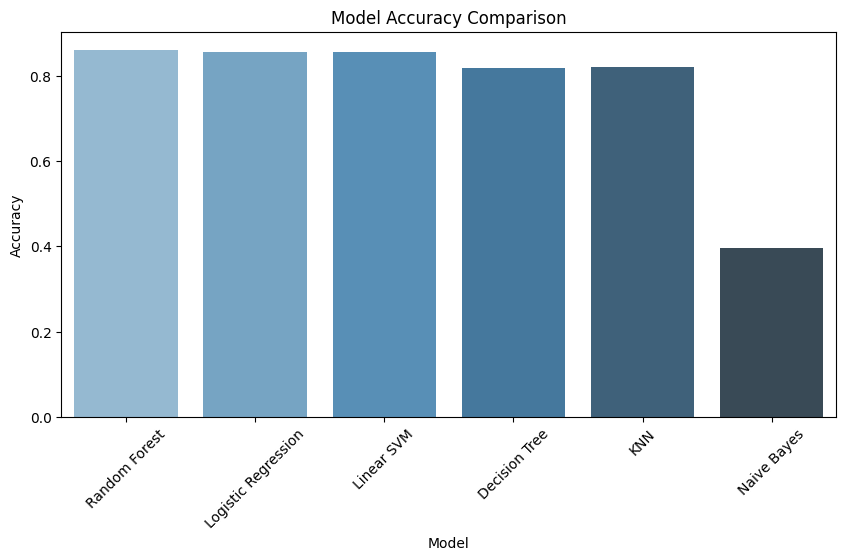

/tmp/ipython-input-1118574595.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=results_df, palette="Greens_d")


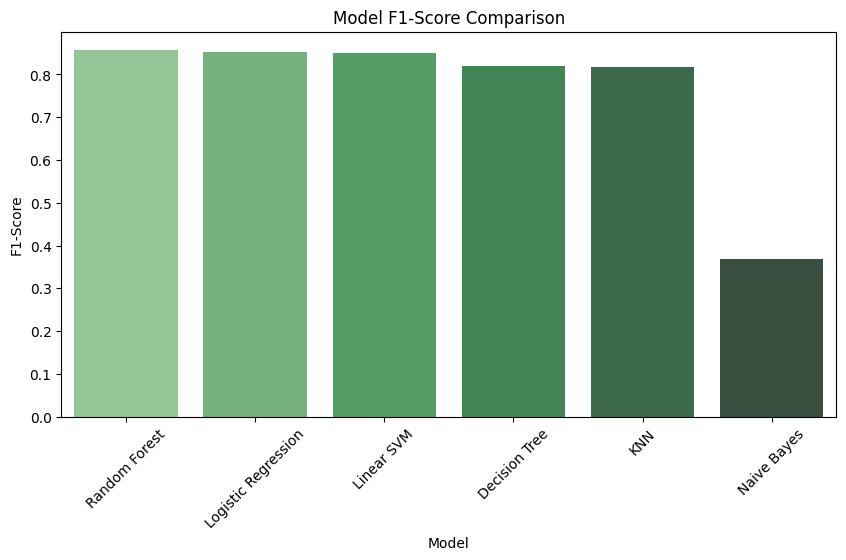

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# Compare Models Performance
# =====================================================
plt.figure(figsize=(10,5))

# Accuracy
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# F1-Score
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1-Score", data=results_df, palette="Greens_d")
plt.title("Model F1-Score Comparison")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()


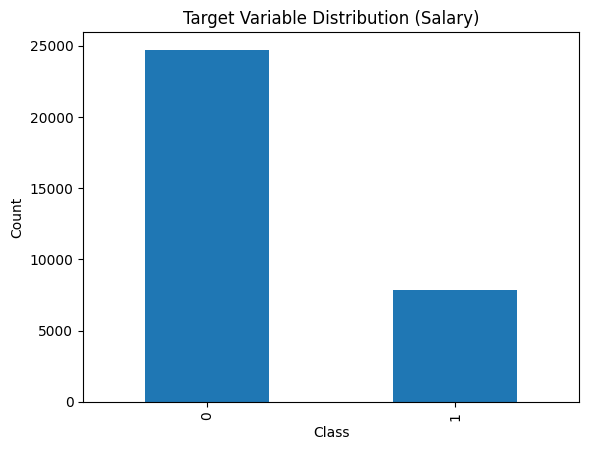

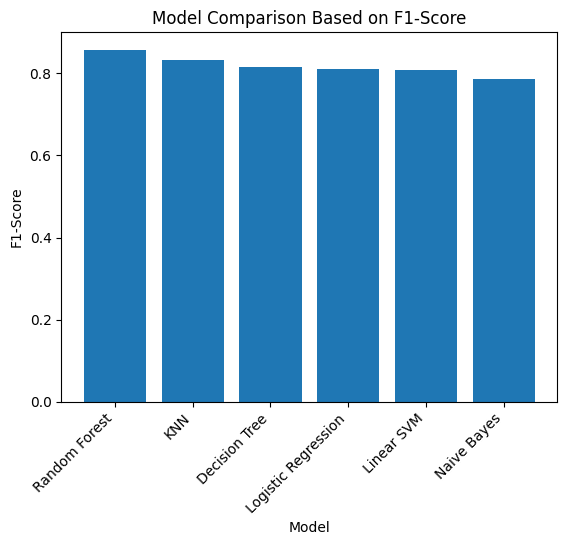

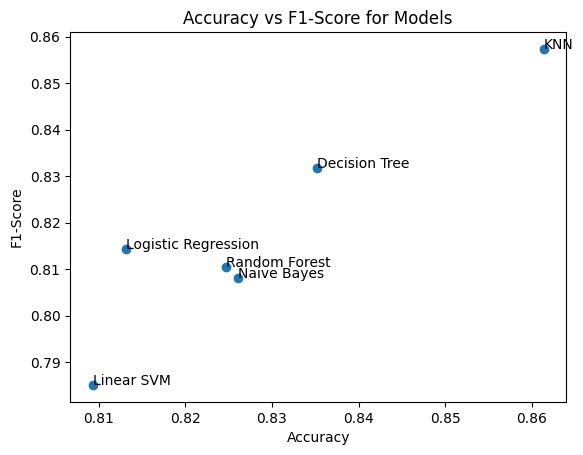

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df[target].value_counts().plot(kind='bar')
plt.title("Target Variable Distribution (Salary)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.bar(results_df["Model"], results_df["F1-Score"])
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison Based on F1-Score")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.show()

plt.figure()
plt.scatter(results_df["Accuracy"], results_df["F1-Score"])
for i, model in enumerate(results_df["Model"]):
    plt.text(results_df["Accuracy"][i], results_df["F1-Score"][i], model)

plt.xlabel("Accuracy")
plt.ylabel("F1-Score")
plt.title("Accuracy vs F1-Score for Models")
plt.show()